## Create word embeddings from PubMed patient summaries

#### IMPORT PACKAGES

In [316]:
# data manipulation / visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sys

# print full numpy array
np.set_printoptions(threshold=sys.maxsize)

# keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

#### LOAD DATA

In [317]:
df = pd.read_csv('<name of csv>')

print(df.shape[0])
print(df.head(3))

100
   patient_id patient_uid      PMID                         file_path  \
0           0   7665777-1  33492400  comm/PMC007xxxxxx/PMC7665777.xml   
1          16   8675570-1  34956761  comm/PMC008xxxxxx/PMC8675570.xml   
2          72   8698451-1  34943737  comm/PMC008xxxxxx/PMC8698451.xml   

                                               title  \
0  Early Physical Therapist Interventions for Pat...   
1  Bilateral Ureteral Obstruction Causing Acute K...   
2  Early Diagnosis and Antibiotic Treatment Combi...   

                                             patient               age gender  \
0  This 60-year-old male was hospitalized due to ...  [[60.0, 'year']]      M   
1  We describe the case of a 55-year-old male who...  [[55.0, 'year']]      M   
2  A 20-year-old Caucasian male (1.75 m tall and ...  [[20.0, 'year']]      M   

                                    similar_patients  \
0  ['7665777-2', '7665777-3', '7665777-4', '76657...   
1            ['7202579-1', '6916532-1', '

#### DEFINE CLASS LABELS

In [318]:
# add labels for classification task

labels = []

df['label'] = ''

for index, row in df.iterrows():
    if 'COVID-19' in row['patient']:
        row['label'] = '1'
    else:
        row['label'] = '0' 

    labels.append(row['label'])

labels_arr = np.array(labels).astype(float)

print(labels_arr)

[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0.]


#### CREATE SAMPLE CORPUS OF DOCUMENTS

In [319]:
corp = []
corp_word_count =[]

for index, row in df.iterrows():
    
    #print("orig length:", len(row['patient']))

    text = (re.split('(?<!\d)[.](?!\d)', row['patient']))[:1]

    sentence = []

    for i in text:
        sentence.append(i + ".")
        
        if i == text[-1]:
            #print("sentence list:", sentence)

            str = ' '.join(sentence)

            str_split = str.split()

            str_count = len(str_split)

            corp.append(str)

            corp_word_count.append(str_count)

print("corpus:", corp[:3])

# total num of words in corpus
print("words per doc:", corp_word_count)
print("words in corpus:", sum(corp_word_count))

corpus: ['This 60-year-old male was hospitalized due to moderate ARDS from COVID-19 with symptoms of fever, dry cough, and dyspnea.', 'We describe the case of a 55-year-old male who presented to the emergency department via emergency medical services for the chief complaint of sudden onset shortness of breath that woke him from his sleep just prior to arrival.', 'A 20-year-old Caucasian male (1.75 m tall and 76 kg (BMI 24.8)), was admitted to the medical department for persistent hyperpyrexia, severe sore throat, dyspnea, and impaired consciousness with stupor.']
words per doc: [19, 38, 30, 22, 14, 22, 28, 23, 25, 26, 45, 15, 25, 14, 21, 30, 28, 21, 20, 26, 28, 23, 22, 23, 34, 36, 19, 18, 38, 38, 32, 25, 14, 38, 22, 38, 42, 39, 19, 42, 20, 30, 18, 22, 19, 17, 42, 21, 28, 8, 28, 17, 15, 38, 45, 7, 27, 48, 30, 31, 25, 13, 15, 20, 24, 20, 32, 20, 22, 21, 24, 12, 39, 20, 16, 23, 22, 30, 29, 55, 40, 17, 31, 19, 16, 33, 29, 12, 11, 19, 31, 21, 20, 17, 32, 15, 20, 15, 26, 42]
words in corpus:

#### INTEGER ENCODE THE DOCUMENTS

In [320]:
# integer encode words

encod_corp = []

# print words in a document
for i, v in enumerate(corp[:3]):
    print("Document", i+1, "words:", v)

# fit tokenizer on docs
t = Tokenizer(filters='!"#$%&()*+,/:;<=>?@[\\]^_`{|}~\t\n') # does not include '-'
t.fit_on_texts(corp) 
encod_corp = t.texts_to_sequences(corp)

# print integer encoding for each word in a document
#for i,v in enumerate(encod_corp, 1):
#    print(i, v)

# get unique words
vocab = t.word_index

# print vocab list
print("vocab:")
for i,v in enumerate(vocab, 1):
   print(i,v)

vocab_size = len(vocab)
print('Vocab size = %s unique words' % vocab_size)

Document 1 words: This 60-year-old male was hospitalized due to moderate ARDS from COVID-19 with symptoms of fever, dry cough, and dyspnea.
Document 2 words: We describe the case of a 55-year-old male who presented to the emergency department via emergency medical services for the chief complaint of sudden onset shortness of breath that woke him from his sleep just prior to arrival.
Document 3 words: A 20-year-old Caucasian male (1.75 m tall and 76 kg (BMI 24.8)), was admitted to the medical department for persistent hyperpyrexia, severe sore throat, dyspnea, and impaired consciousness with stupor.
vocab:
1 a
2 of
3 with
4 and
5 the
6 to
7 was
8 presented
9 for
10 male
11 in
12 history
13 patient
14 female
15 an
16 medical
17 man
18 our
19 woman
20 hospital
21 right
22 pain
23 admitted
24 emergency
25 department
26 who
27 by
28 from
29 fever
30 referred
31 this
32 after
33 on
34 past
35 at
36 cough
37 left
38 abdominal
39 significant
40 case
41 caucasian
42 kg
43 weight
44 due
45 dry
4

#### ADD PADDING TO DOCUMENTS

In [321]:
# to create embeddings all documents must be the same length

maxlen=-1

# find max number of words per document
for i, v in enumerate(corp):
    #print("Document", i+1, "words:", len(v.split()))
    if (maxlen<len(v.split())):
        maxlen=len(v.split())

print("Max number of words in any doc is:", maxlen)

Max number of words in any doc is: 55


In [322]:
# pad the documents with zeros

pad_corp=pad_sequences(encod_corp,maxlen=maxlen,padding='post',value=0.0)

print(pad_corp)

[[ 31 281  10   7 160  44   6 282 283  28  54   3  84   2  29  45  36   4
  161   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 85 284   5  40   2   1 162  10  26   8   6   5  24  25 163  24  16 285
    9   5  66  86   2 164  46 110   2 111  67 286 287  28  68 165 288  87
    6 289   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  1 290  41  10 291 292 293   4 294  42 112 295   7  23   6   5  16  25
    9  55 296 297 298 299  56   4 300 301   3 302   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  1  47  48 303 113   8   6   5  24  25   2   1 166  20   3 304  29  57
   88 114   4 305   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  5  13   7   1 167  17   3   5  66 168   2 306   4 307   0   0   0   0
    0   0 

#### CREATE WORD EMBEDDINGS

In [323]:
# create keras model

model = Sequential() 

# define embedding
embedding_layer = Embedding(
                        input_dim=vocab_size+1, 
                        output_dim=2, 
                        input_length=maxlen)

# add layers
model.add(embedding_layer)

# configure the learning process
model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy'])

# model prediction
embedding_output = model.predict(pad_corp)

4/4 [==============================] - 0s 2ms/step


In [324]:
# embedding layer

embedding_layer = model.get_layer(index=0)

embedding_layer_weights = embedding_layer.get_weights()[0]

print(embedding_layer_weights)

[[ 7.04301521e-03  3.39607336e-02]
 [ 4.43325080e-02 -4.35174219e-02]
 [-1.84080116e-02 -4.48269024e-02]
 [-4.74609025e-02  4.29279730e-03]
 [ 1.24161355e-02  4.76875566e-02]
 [-1.89721715e-02 -2.00293791e-02]
 [-2.18192935e-02 -4.75601330e-02]
 [-2.51929164e-02 -9.96438414e-03]
 [ 4.05940078e-02 -4.76400144e-02]
 [ 2.18229555e-02  1.74873210e-02]
 [-4.54872735e-02  1.42193772e-02]
 [ 3.07981260e-02  7.05496222e-03]
 [-4.39414382e-02 -2.46371031e-02]
 [-2.11061966e-02  4.22752760e-02]
 [-2.29372829e-03 -3.21153179e-02]
 [ 2.99890898e-02  2.74799131e-02]
 [-5.45565039e-03  2.30021402e-03]
 [-6.06773049e-03  1.82795189e-02]
 [ 1.65263303e-02 -4.36905734e-02]
 [ 5.10007143e-03 -4.93568890e-02]
 [ 1.22102611e-02 -1.11081488e-02]
 [-7.33039528e-03 -1.42830722e-02]
 [-2.13156100e-02  4.10173573e-02]
 [-2.36293431e-02  3.28640677e-02]
 [-4.01054509e-02  2.51601376e-02]
 [ 7.52447918e-03 -3.85691747e-02]
 [ 4.35011424e-02 -2.55626440e-03]
 [ 3.61508615e-02 -6.61809370e-03]
 [-2.37337109e-02  1

In [325]:
# output of the embedding layer for a given input sequence

print(embedding_output)

print(embedding_output.shape)

[[[ 2.08440907e-02  3.52325179e-02]
  [-1.70833841e-02 -4.37318459e-02]
  [-4.54872735e-02  1.42193772e-02]
  [-2.51929164e-02 -9.96438414e-03]
  [-4.34226505e-02 -2.67695189e-02]
  [-3.18809636e-02  3.46260779e-02]
  [-2.18192935e-02 -4.75601330e-02]
  [-2.98908353e-02  4.53143977e-02]
  [-1.22950561e-02  6.99316338e-03]
  [-2.37337109e-02  1.86443813e-02]
  [ 3.06889303e-02  1.94786862e-03]
  [-4.74609025e-02  4.29279730e-03]
  [ 1.48306154e-02  2.09446885e-02]
  [-1.84080116e-02 -4.48269024e-02]
  [ 1.89989805e-03 -4.93193381e-02]
  [ 3.09743322e-02 -4.47934866e-03]
  [ 8.97834450e-03 -3.25287804e-02]
  [ 1.24161355e-02  4.76875566e-02]
  [-1.60508230e-03  2.42550261e-02]
  [ 7.04301521e-03  3.39607336e-02]
  [ 7.04301521e-03  3.39607336e-02]
  [ 7.04301521e-03  3.39607336e-02]
  [ 7.04301521e-03  3.39607336e-02]
  [ 7.04301521e-03  3.39607336e-02]
  [ 7.04301521e-03  3.39607336e-02]
  [ 7.04301521e-03  3.39607336e-02]
  [ 7.04301521e-03  3.39607336e-02]
  [ 7.04301521e-03  3.396073

#### VISUALIZE INITIAL WORD EMBEDDINGS

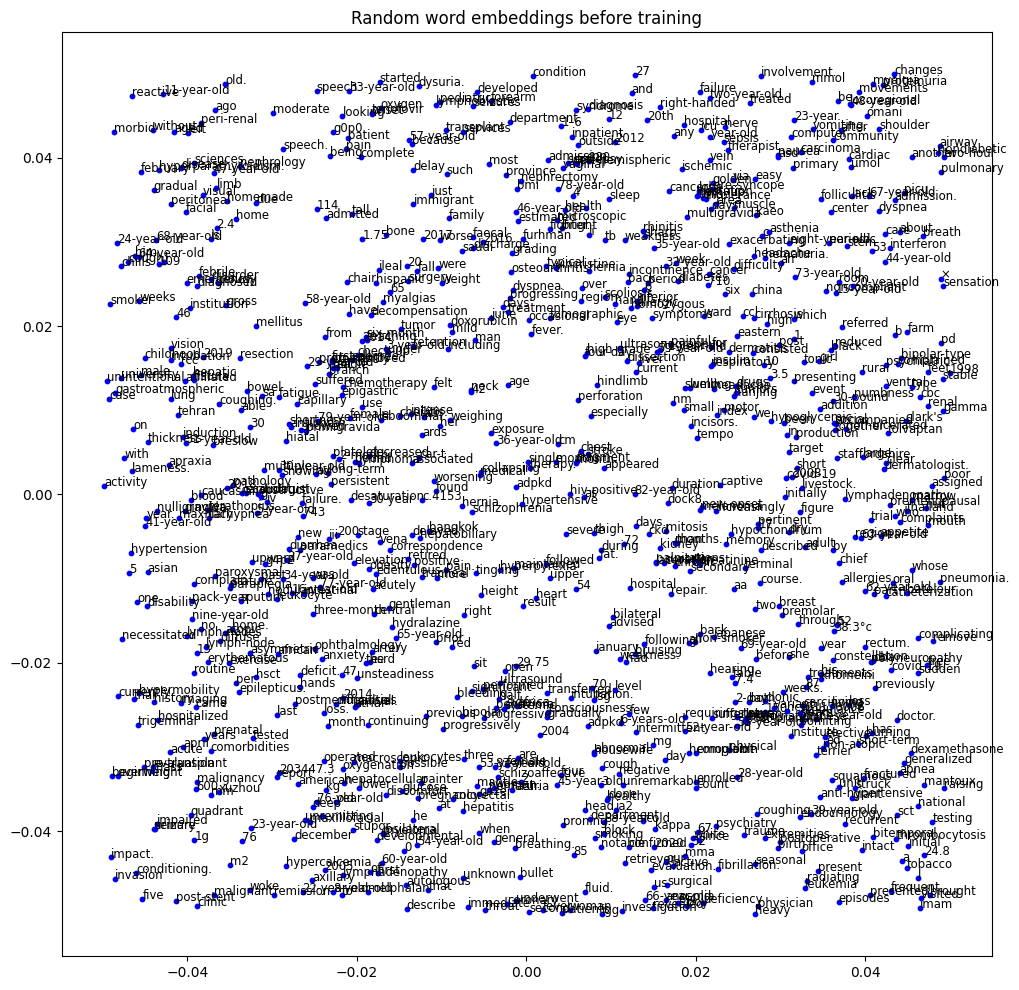

In [326]:
# visualization (before training)

plt.figure(figsize=(12,12))

# plot weights
plt.scatter(embedding_layer_weights[:, 0], embedding_layer_weights[:, 1], c='blue', s=10)

# plot vocab
for i, v in enumerate(vocab, 1):
    x, y = embedding_layer_weights[i]
    plt.text(x, y, v, fontsize='small')


plt.title('Random word embeddings before training');

In [327]:
# summary of the model

print(model.summary())

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 55, 2)             1864      
                                                                 
Total params: 1864 (7.28 KB)
Trainable params: 1864 (7.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


#### TRAIN THE MODEL

In [328]:
# create another keras model

model = Sequential() 

# define embedding
embedding_layer = Embedding(
                        input_dim=vocab_size+1, 
                        output_dim=2, 
                        input_length=maxlen)

# add layers
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid')) 

# configure the learning process
model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy'])

In [329]:
# summary of the model

print(model.summary())

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, 55, 2)             1864      
                                                                 
 flatten_16 (Flatten)        (None, 110)               0         
                                                                 
 dense_16 (Dense)            (None, 1)                 111       
                                                                 
Total params: 1975 (7.71 KB)
Trainable params: 1975 (7.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [330]:
# fit the model

model.fit(pad_corp, labels_arr, epochs=50, verbose=1)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2000
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4700
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.6900
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8500
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8700
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8800
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8900
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8900
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8900
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8900
Epoch 11/5

In [331]:
# evaluate the model

loss, accuracy = model.evaluate(pad_corp, labels_arr, verbose=1)
print('Accuracy: %f' % (accuracy*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8900
Accuracy: 88.999999


#### VISUALIZE TRAINED WORD EMBEDDINGS

In [332]:
embedding_layer = model.get_layer(index=0)

embedding_layer_weights = embedding_layer.get_weights()[0]

print(embedding_layer_weights)

[[ 1.98989511e-01 -3.14624339e-01]
 [-2.38433331e-01 -4.64148121e-03]
 [ 7.99545497e-02 -1.89852685e-01]
 [-9.45472196e-02 -2.39245459e-01]
 [ 1.89371392e-01 -1.90127283e-01]
 [ 6.54970035e-02 -1.81315899e-01]
 [ 5.78202605e-02 -2.19380304e-01]
 [-1.62101448e-01 -4.36955616e-02]
 [-2.00777426e-01 -1.28373295e-01]
 [ 1.18960112e-01 -1.19875915e-01]
 [-1.83219716e-01 -1.85382143e-01]
 [ 3.87907252e-02 -1.92879364e-01]
 [-1.77739605e-01 -1.07844055e-01]
 [ 1.14551142e-01  1.42817095e-01]
 [-4.60828170e-02 -1.52452797e-01]
 [-1.48044720e-01 -7.99614638e-02]
 [-5.55824451e-02 -1.40477657e-01]
 [-1.91318780e-01 -9.13374275e-02]
 [ 1.92729291e-02 -7.62850270e-02]
 [-8.91718268e-02 -6.11292496e-02]
 [ 2.77117193e-02 -1.94958389e-01]
 [ 1.20860234e-01 -1.62291959e-01]
 [-9.81984362e-02 -1.10193618e-01]
 [-1.72997311e-01 -2.51282901e-01]
 [-4.52760942e-02 -1.17159039e-01]
 [-5.66219948e-02 -2.05163077e-01]
 [ 1.21527329e-01 -2.27225348e-01]
 [ 9.89224166e-02 -1.23091139e-01]
 [-1.29399560e-02 -1

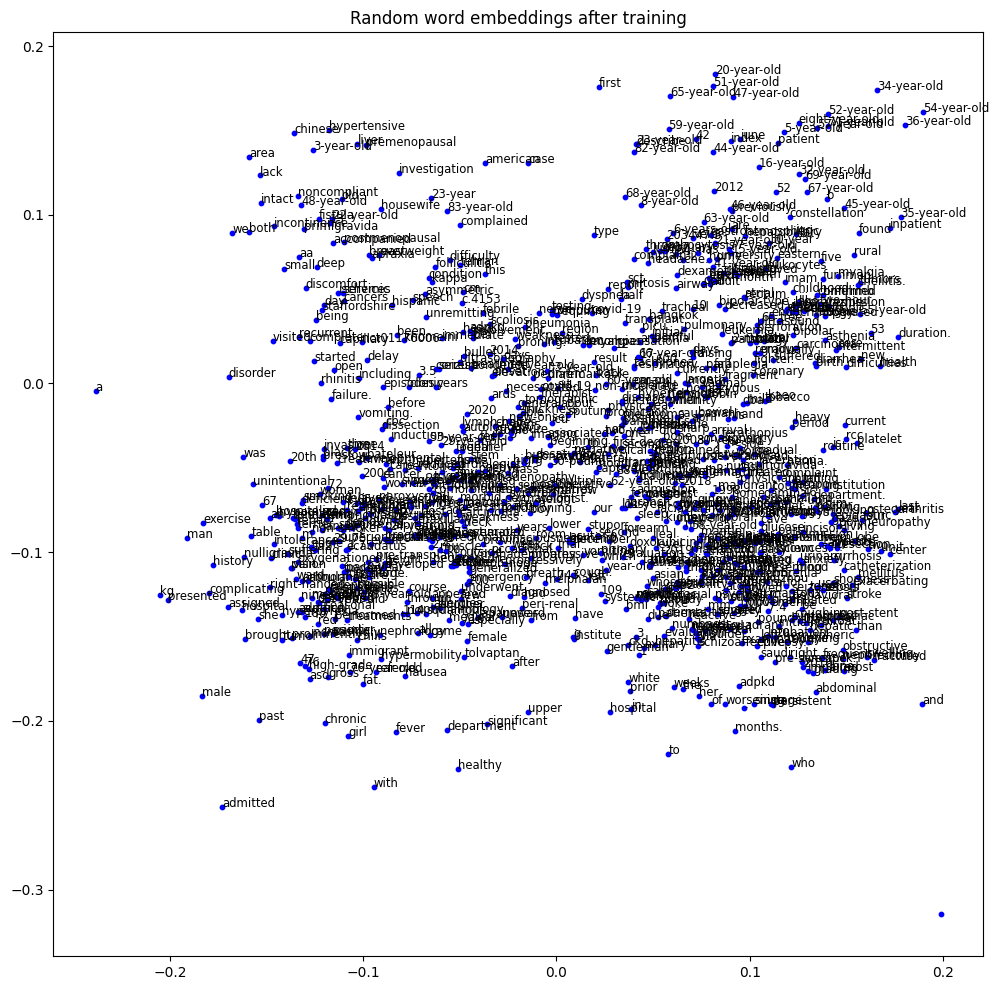

In [333]:
# visualization (after training)

plt.figure(figsize=(12,12))

# plot weights
plt.scatter(embedding_layer_weights[:, 0], embedding_layer_weights[:, 1], c='blue', s=10)

# plot words
for i, v in enumerate(vocab, 1):
    x, y = embedding_layer_weights[i]
    plt.text(x, y, v, fontsize='small')


plt.title('Random word embeddings after training');